In [2]:
import gradio as gr
import torch
from src.train import train
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
feature_names = range(X.shape[1])
model,data = train(X=X, y=y)

Target labels: [0 1]


wandb: Currently logged in as: lamastico2-0 (lamastico2-0-hes-so-valais-wallis) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Detected [huggingface_hub.inference] in use.
wandb: Use W&B Weave for improved LLM call tracing. Install Weave with `pip install weave` then add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/


lr: 0.001
Epoch 01 | Loss: 0.6967 | Acc: 0.4897 | Val Loss: 0.6914 | Val Acc: 0.5000
Epoch 02 | Loss: 0.6933 | Acc: 0.5220 | Val Loss: 0.6877 | Val Acc: 0.5263
Epoch 03 | Loss: 0.6899 | Acc: 0.5455 | Val Loss: 0.6840 | Val Acc: 0.5877
Epoch 04 | Loss: 0.6865 | Acc: 0.5865 | Val Loss: 0.6801 | Val Acc: 0.6140
Epoch 05 | Loss: 0.6831 | Acc: 0.6246 | Val Loss: 0.6763 | Val Acc: 0.6491
Epoch 06 | Loss: 0.6797 | Acc: 0.6862 | Val Loss: 0.6725 | Val Acc: 0.7456
Epoch 07 | Loss: 0.6765 | Acc: 0.7361 | Val Loss: 0.6689 | Val Acc: 0.7895
Epoch 08 | Loss: 0.6734 | Acc: 0.7654 | Val Loss: 0.6655 | Val Acc: 0.8246
Epoch 09 | Loss: 0.6703 | Acc: 0.8006 | Val Loss: 0.6622 | Val Acc: 0.8509
Epoch 10 | Loss: 0.6674 | Acc: 0.8387 | Val Loss: 0.6589 | Val Acc: 0.8772
Epoch 11 | Loss: 0.6646 | Acc: 0.8622 | Val Loss: 0.6557 | Val Acc: 0.8772
Epoch 12 | Loss: 0.6618 | Acc: 0.8798 | Val Loss: 0.6525 | Val Acc: 0.8860
Epoch 13 | Loss: 0.6590 | Acc: 0.8827 | Val Loss: 0.6494 | Val Acc: 0.8860
Epoch 14 | Loss

Train Accuracy,▁▂▂▃▃▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇████████████████████
Train Loss,█████▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▁▁
Val Accuracy,▁▁▂▃▃▅▆▆▇▇▇▇▇▇██████████████████████████
Val Loss,█████▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁
Train Accuracy,0.93548
Train Loss,0.49489
Val Accuracy,0.94737
Val Loss,0.47284


In [4]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [5]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(data["X_test_tensor"])
    y_pred = (y_pred_probs > 0.5).int()

In [6]:
y_pred_np = y_pred.numpy().flatten()
y_true_np = data["y_test_tensor"].numpy().flatten()

print(classification_report(y_true_np, y_pred_np, target_names=["malignant", "benign"]))


              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



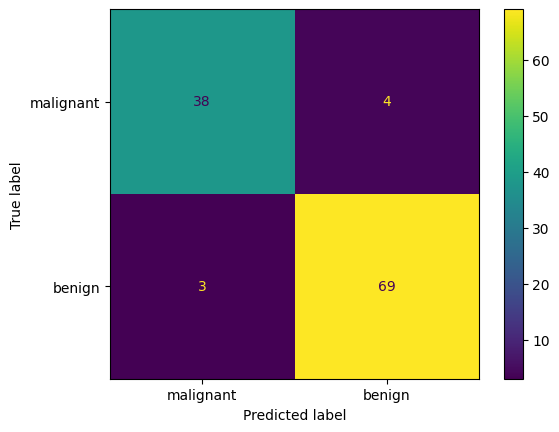

In [7]:
cm = confusion_matrix(y_true_np, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["malignant", "benign"])
disp.plot()

# DEXIRE

In [17]:
from explainer.dexire import get_dexire_rules

In [20]:
rules = get_dexire_rules(model,data)

y_train unique values: [0 1]
class_names: ['malignant', 'benign']
6
feature_6
Symbolic expression: feature_6 <= 0.5
9
feature_9
Symbolic expression: feature_9 <= 0.5
Symbolic expression: feature_9 > 0.5
8
feature_8
Symbolic expression: feature_8 <= 0.5
Symbolic expression: feature_8 > 0.5
5
feature_5
Symbolic expression: feature_5 <= 0.5
Symbolic expression: feature_5 > 0.5
11
feature_11
Symbolic expression: feature_11 <= 0.5
Symbolic expression: feature_11 > 0.5
Symbolic expression: feature_6 > 0.5
14
feature_14
Symbolic expression: feature_14 <= 0.5
Symbolic expression: feature_14 > 0.5
27
X_27
Symbolic expression: X_27 <= 0.416
22
X_22
Symbolic expression: X_22 <= 0.636
26
X_26
Symbolic expression: X_26 <= 0.39
28
X_28
Symbolic expression: X_28 <= 1.76
Symbolic expression: X_28 > 1.76
Symbolic expression: X_26 > 0.39
Symbolic expression: X_22 > 0.636
Symbolic expression: X_27 > 0.416
20
X_20
Symbolic expression: X_20 <= -0.178
Symbolic expression: X_20 > -0.178
10
X_10
Symbolic expr

In [21]:
rules

[IF ((X_27 <= 0.416) AND (X_22 > 0.636)) THEN benign, IF ((X_27 <= 0.296) AND (X_12 > 0.782)) THEN benign, IF ((X_27 > 0.296) AND (X_7 > 0.276) AND (X_10 > -0.802) AND (X_12 <= -0.383)) THEN benign, IF ((X_27 <= 0.416) AND (X_22 <= 0.636) AND (X_26 > 0.39)) THEN malignant, IF ((X_27 <= 0.296) AND (X_12 <= 0.782)) THEN malignant, IF ((X_27 <= 0.416) AND (X_22 <= 0.636) AND (X_26 <= 0.39) AND (X_28 > 1.76)) THEN benign, IF ((X_27 > 0.416) AND (X_20 > -0.178) AND (X_10 > -0.818) AND (X_27 > 0.505)) THEN benign, IF ((X_27 > 0.469) AND (X_2 > -0.64) AND (X_27 > 0.505)) THEN benign, IF ((X_27 <= 0.469) AND (X_22 <= 0.636) AND (X_26 > 0.511)) THEN benign, IF ((X_27 > 0.296) AND (X_7 > 0.276) AND (X_10 <= -0.802)) THEN malignant, IF ((X_27 > 0.296) AND (X_7 > 0.276) AND (X_10 > -0.802) AND (X_12 > -0.383)) THEN benign, IF ((X_27 > 0.296) AND (X_7 <= 0.276)) THEN malignant, IF ((X_27 <= 0.416) AND (X_22 <= 0.636) AND (X_26 <= 0.39) AND (X_28 <= 1.76)) THEN malignant, IF ((X_27 > 0.416) AND (X_2

# CIU

In [27]:
from explainer.ciu import get_explain_CIU

In [28]:
CIUres = get_explain_CIU(model, data, out_name=["malignant", "benign"])
display(CIUres)


AttributeError: 'Sequential' object has no attribute 'predict'

# DEXIRE-EXO

In [22]:
from dexire_exo.ga_engine import GAEngine
from dexire_exo.rule_formatter import format_if_elif_else
from sklearn.metrics import accuracy_score, classification_report
from src.config import Config
from explainer.dexire_exo import get_dexire_exo_rules

In [23]:
best, test_acc, uncov_te, engine = get_dexire_exo_rules(feature_names, model, data)


AttributeError: 'Sequential' object has no attribute 'predict'

In [ ]:
print("\nRules in IF–ELIF–ELSE form (GA):")
print(format_if_elif_else(best, feature_names, engine.operator_set))

In [ ]:
print("\n=== FINAL GA RESULTS ===")
print(f"Fidelity (train vs model): {best.fitness.values[0]:.3f}")
print(f"# Predicates             : {best.fitness.values[1]}")
print(f"Uncovered (train)        : {best.fitness.values[2]}")
print(f"Test accuracy (matched)  : {test_acc:.3f} | Uncov test: {uncov_te}")

In [ ]:
print(f"\nBest-by-generation CSV saved as: {config.ga_params.get('log_csv', 'ga_best_by_gen.csv')}")

In [ ]:
def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

In [ ]:
main = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
    api_name="predict"
)

In [ ]:
main.launch() # add share=True to have a public server 

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
